In [46]:
from keras.datasets import imdb

# num_words=10000 的意思是仅保留训练数据中前10 000 个最常出现的单词,低频单 词将被舍弃
# 得到的向量数据不会太大，便于处理
# train_labels 和 test_labels 是0 和 1 组成的列表，其中0 代表负面（negative）,1 代表正面（positive）。

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [47]:
print(len(train_data),len(train_labels))

25000 25000


In [48]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [49]:
print(train_labels,len(train_labels),sep='---')

[1 0 0 ... 0 1 0]---25000


In [50]:
# 由于限定为前10000个最常见的单词，单词索引不会超过10000
max([max(i) for i in train_data])

9999

In [51]:
# 查看编码字典
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [52]:
# 解码训练数据为可以看的英文
# 先反转 index 和 word
index_word = dict([(value,key) for (key,value) in word_index.items()])

# 解码单条训练数据示例
# 将评论解码。注意，索引减去了3，因为0、1、2 是为“padding”（填充）、
# “ start of sequence”（序 列开始）、“unknown”（未知词）分别保留的索引

decoded_review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 准备数据

不能将整数序列直接输入神经网络。你需要将列表转换为张量。转换方法有以下两种：
- 填充列表，使其具有相同的长度，再将列表转换成形状为 (samples, word_indices) 的整数张量，然后网络第一层使用能处理这种整数张量的层（即 Embedding 层，本书 后面会详细介绍）
-  对列表进行 one-hot 编码，将其转换为 0 和 1 组成的向量。举个例子，序列 [3, 5] 将会 被转换为10 000 维向量，只有索引为3 和 5 的元素是1，其余元素都是0。然后网络第 一层可以用 Dense 层，它能够处理浮点数向量数据。 

#### 将整数序列向量化

In [53]:
# 使用one_hot编码将整数数据编码为二进制数据
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

# 将训练数据向量化
# 将 results[i] 的指定索引设为 1
x_train = vectorize_sequences(train_data)
# 将测试数据向量化
x_test = vectorize_sequences(test_data)

In [54]:
# 查看向量化的数据
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [55]:
print(len(x_train[0]))

10000


In [56]:
x_train[8].shape

(10000,)

In [57]:
# 新闻中的重复单词只出现一次，示例如下
array_zeros = np.zeros((3,5))
array_zeros[1,[0,2,4,2,4]] = 9
print(array_zeros)

[[0. 0. 0. 0. 0.]
 [9. 0. 9. 0. 9.]
 [0. 0. 0. 0. 0.]]


#### 将标签向量化

In [58]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [59]:
# 向量化的数据可以输入网络中，现在开始构建模型
# 输入数据是向量，而标签是标量（1 和 0），这是你会遇到的最简单的情况
# 带有relu激活的全连接层 Dense 在这种问题上表现很好

In [60]:
# 定义模型
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [61]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [63]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 训练模型

In [64]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=[x_val,y_val])

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 236us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3165 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 166us/step - 

In [66]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

#### 绘制训练损失和验证损失

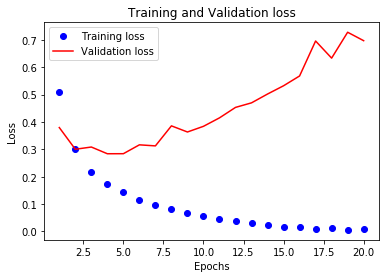

In [70]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 绘制训练精度和验证精度

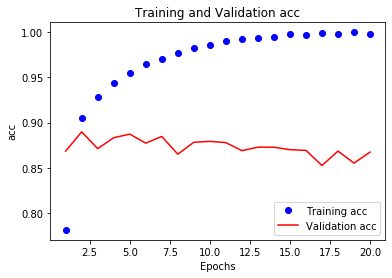

In [71]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

### 降低训练次数，重新训练

In [73]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['acc'])

model.fit(x_train,y_train,epochs=4,batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.4470 - acc: 0.8242
Epoch 2/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.2557 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1969 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.1645 - acc: 0.9423


In [74]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 128us/step


In [75]:
results

[0.31799822454452514, 0.87512]

### 生成预测

In [77]:
a = model.predict(x_test)

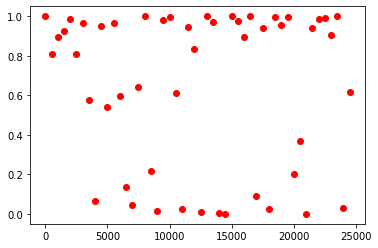

In [81]:
num = range(1,len(a)+1,500)
value = [a[i] for i in num]
plt.plot(num,value,'ro',)